# CIFAR Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Standardize values in the [0, 1]

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

## Standardize values in the [0, 1]
train_images = (train_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))
test_images  = (test_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))

# model
standardize_1_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

standardize_1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
standardize_1_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
standardize_1_history_data = standardize_1_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=2048, epochs=50)
print(standardize_1_history_data.history)

test_loss, test_acc = standardize_1_model.evaluate(test_images,  test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
25/25 [==============================] - 7s 228ms/step - loss: 2.2411 - accuracy: 0.1802 - val_loss: 2.0273 - val_accuracy: 0.2573
Epoch 2/50
25/25 [==============================] - 3s 109ms/step - loss: 1.9285 - accuracy: 0.3068 - val_loss: 1.9170 - val_accuracy: 0.3124
Epoch 3/50
25/25 [==============================] - 3s 106ms/step - loss: 1.8218 - accuracy: 0.3478 - val_loss: 1.8335 - val_accuracy: 0.3571
Epoch 4/50
25/25 [==============================] - 3s 111ms/step - loss: 1.7640 - accuracy: 0.3682 - val_loss: 1.8525 - val_accuracy: 0.3462
Epoch 5/50
25/25 [==============================] - 4s 155ms/step - loss: 1.7180 - accuracy: 0.3862 - val_loss: 1.8019 - val_accuracy: 0.3719
Epoch 6/50
25/25 [==============================] - 3s 109ms/step - loss: 1.6932 - accuracy: 0.3951 - val_loss: 1.8135 - val_accuracy: 0.3709
Epoch 7/50
25/25 [==============================] - 3s 110ms/step - loss: 1.6581 - accuracy: 0.4069 - val_loss: 1.7467 - val_accuracy: 0.3863
Epoch 

## Z-score normalization

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Z-score normalization
mean_train = np.mean(train_images, axis=(0, 1, 2))
std_train = np.std(train_images, axis=(0, 1, 2))
eps = 1e-5
train_images = (train_images - mean_train) / (std_train + eps)
test_images  = (test_images - mean_train) / (std_train + eps)

# model
z_score_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

z_score_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
z_score_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
z_score_history_data = z_score_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=4096, epochs=50)
print(z_score_history_data.history)

test_loss, test_acc = z_score_model.evaluate(test_images, test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
13/13 [==============================] - 4s 260ms/step - loss: 2.2724 - accuracy: 0.1625 - val_loss: 2.2012 - val_accuracy: 0.2240
Epoch 2/50
13/13 [==============================] - 3s 221ms/step - loss: 2.1488 - accuracy: 0.2831 - val_loss: 2.0794 - val_accuracy: 0.3066
Epoch 3/50
13/13 [==============================] - 4s 314ms/step - loss: 2.0276 - accuracy: 0.3124 - val_loss: 1.9661 - val_accuracy: 0.3306
Epoch 4/50
13/13 [==============================] - 3s 221ms/step - loss: 1.9248 - accuracy: 0.3438 - val_loss: 1.8785 - val_accuracy: 0.3543
Epoch 5/50
13/13 [==============================] - 3s 215ms/step - loss: 1.8481 - accuracy: 0.3643 - val_loss: 1.8192 - val_accuracy: 0.3669
Epoch 6/50
13/13 [==============================] - 3s 223ms/step - loss: 1.7913 - accuracy: 0.3761 - val_loss: 1.7745 - val_accuracy: 0.3833
Epoch 7/50
13/13 [==============================] - 4s 295ms/step - loss: 1.7454 - accuracy: 0.3905 - val_loss: 1.7444 - val_accuracy: 0.3891
Epoch 

## Standardize values in the [-1, 1]

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# ## Standardize values in the [-1, 1]
min_train = np.min(train_images, axis=(0, 1, 2))
max_train = np.max(train_images, axis=(0, 1, 2))
mean_train = np.mean(train_images, axis=(0, 1, 2))
train_images = ((train_images - mean_train) / (max_train - min_train))
test_images  = ((test_images - mean_train) / (max_train - min_train))

# model
standardize_2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

standardize_2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
standardize_2_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
standardize_2_history_data = standardize_2_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=4096, epochs=50)
print(standardize_2_history_data.history)

test_loss, test_acc = standardize_2_model.evaluate(test_images, test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
13/13 [==============================] - 4s 257ms/step - loss: 2.2953 - accuracy: 0.1434 - val_loss: 2.2249 - val_accuracy: 0.1732
Epoch 2/50
13/13 [==============================] - 3s 221ms/step - loss: 2.1730 - accuracy: 0.2177 - val_loss: 2.1078 - val_accuracy: 0.2662
Epoch 3/50
13/13 [==============================] - 3s 213ms/step - loss: 2.0602 - accuracy: 0.2688 - val_loss: 2.0087 - val_accuracy: 0.2803
Epoch 4/50
13/13 [==============================] - 4s 304ms/step - loss: 1.9774 - accuracy: 0.2961 - val_loss: 1.9404 - val_accuracy: 0.3123
Epoch 5/50
13/13 [==============================] - 3s 220ms/step - loss: 1.9133 - accuracy: 0.3256 - val_loss: 1.8841 - val_accuracy: 0.3351
Epoch 6/50
13/13 [==============================] - 3s 215ms/step - loss: 1.8650 - accuracy: 0.3440 - val_loss: 1.8429 - val_accuracy: 0.3495
Epoch 7/50
13/13 [==============================] - 3s 218ms/step - loss: 1.8264 - accuracy: 0.3591 - val_loss: 1.8095 - val_accuracy: 0.3606
Epoch 

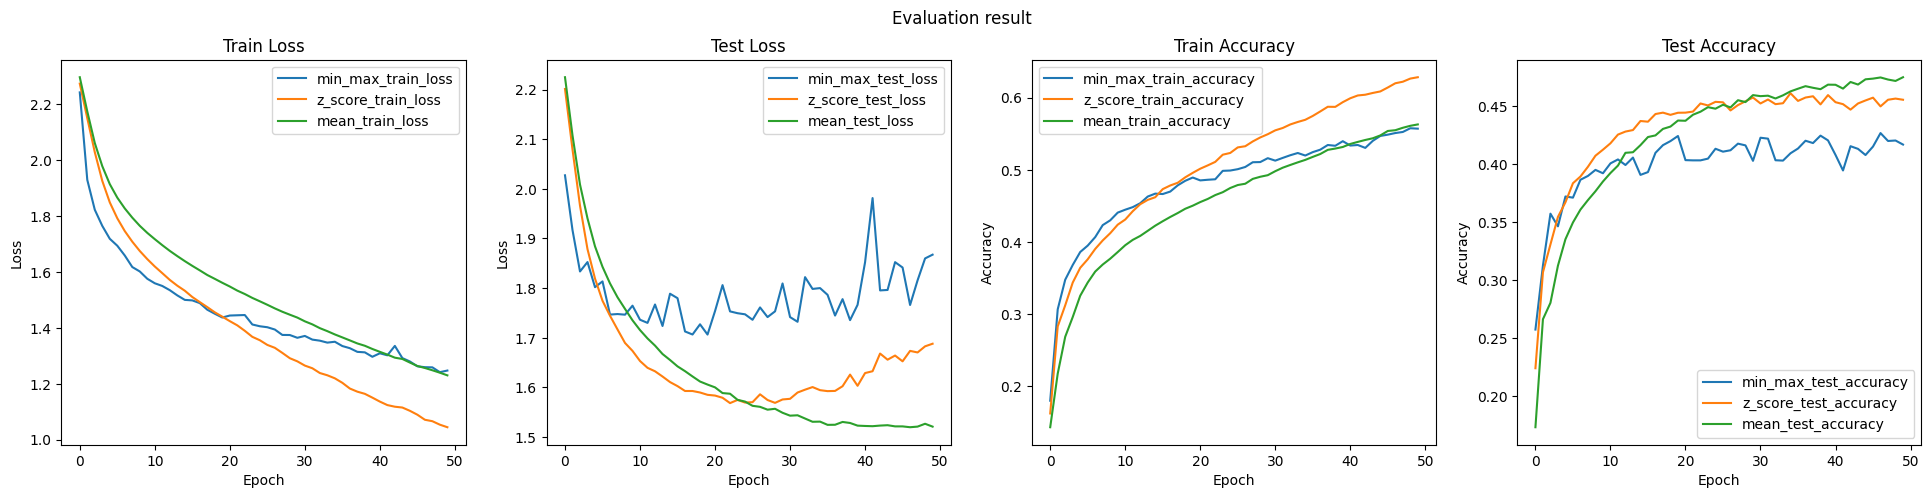

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Evaluation result')

ax1.set_title('Train Loss')
ax1.plot(standardize_1_history_data.history['loss'], label = "min_max_train_loss")
ax1.plot(z_score_history_data.history['loss'], label = "z_score_train_loss")
ax1.plot(standardize_2_history_data.history['loss'], label = "mean_train_loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Test Loss')
ax2.plot(standardize_1_history_data.history['val_loss'], label = "min_max_test_loss")
ax2.plot(z_score_history_data.history['val_loss'], label = "z_score_test_loss")
ax2.plot(standardize_2_history_data.history['val_loss'], label = "mean_test_loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

ax3.set_title('Train Accuracy')
ax3.plot(standardize_1_history_data.history['accuracy'], label = "min_max_train_accuracy")
ax3.plot(z_score_history_data.history['accuracy'], label = "z_score_train_accuracy")
ax3.plot(standardize_2_history_data.history['accuracy'], label = "mean_train_accuracy")
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.set_title('Test Accuracy')
ax4.plot(standardize_1_history_data.history['val_accuracy'], label = "min_max_test_accuracy")
ax4.plot(z_score_history_data.history['val_accuracy'], label = "z_score_test_accuracy")
ax4.plot(standardize_2_history_data.history['val_accuracy'], label = "mean_test_accuracy")
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.legend()
plt.show()